In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import nltk
import string
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from wordcloud import WordCloud

In [ ]:


data=pd.read_csv('/content/Language Detection.csv')

In [ ]:
data.shape

(10337, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
data["Language"].nunique()

17

In [ ]:
#How many rows belong to each language?
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [ ]:
(data.describe())

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


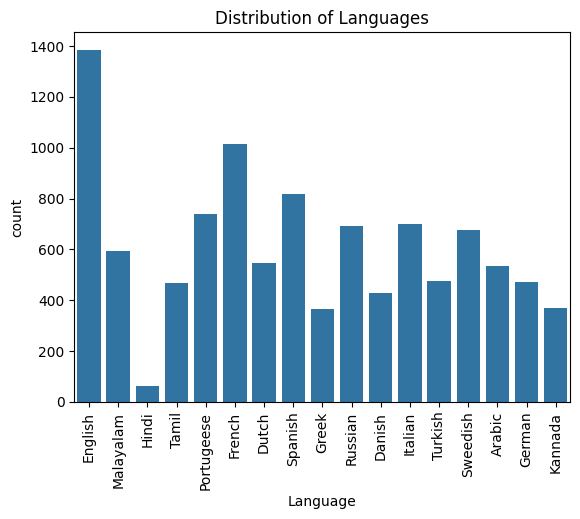

In [ ]:
# Check the distribution of the target variable (e.g., language)
print(data['Language'].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Language', data=data)
plt.title('Distribution of Languages')
plt.xticks(rotation=90)
plt.show()


In [ ]:
pip install matplotlib pandas


In [ ]:


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def preprocess_text(text):
    """
    Preprocess text data
    """
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = string.punctuation
    text = ''.join(char for char in text if char not in punctuation)

    # Remove digits
    text = ''.join(char for char in text if not char.isdigit())

    # Tokenize text
    words = word_tokenize(text)
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join lemmatized words back into a string
    preprocessed_text = ' '.join(lemmatized_words)

    return preprocessed_text

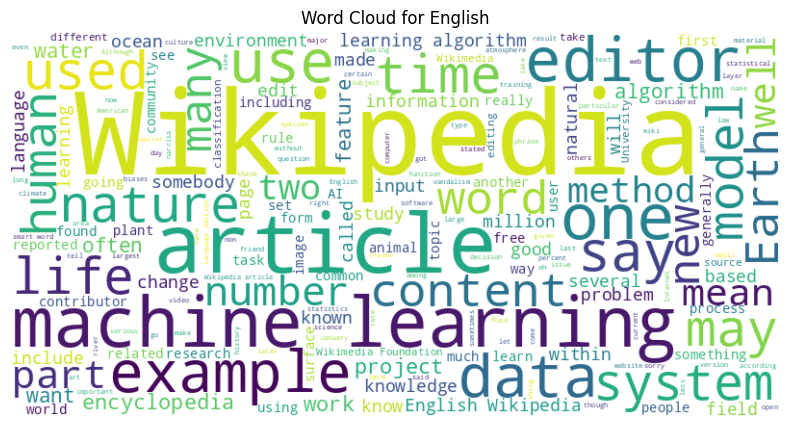

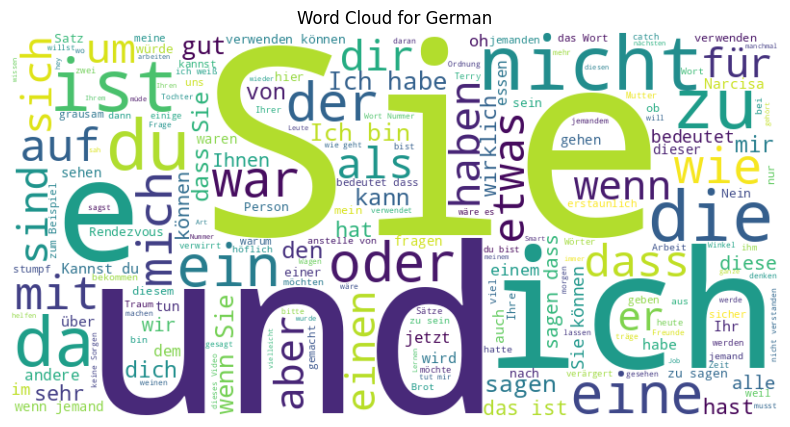

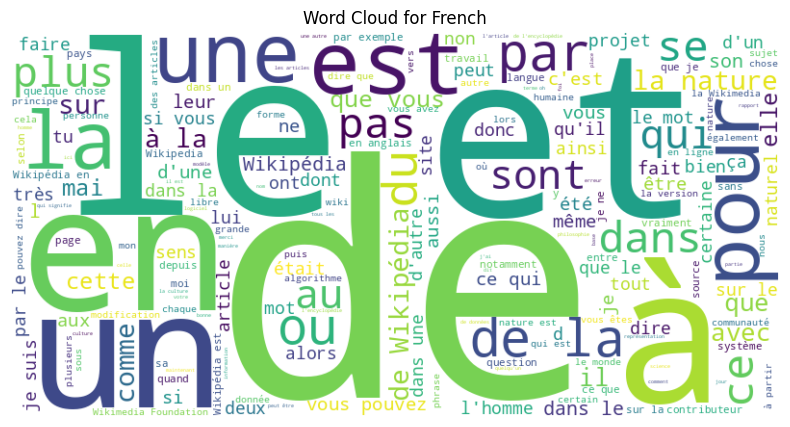

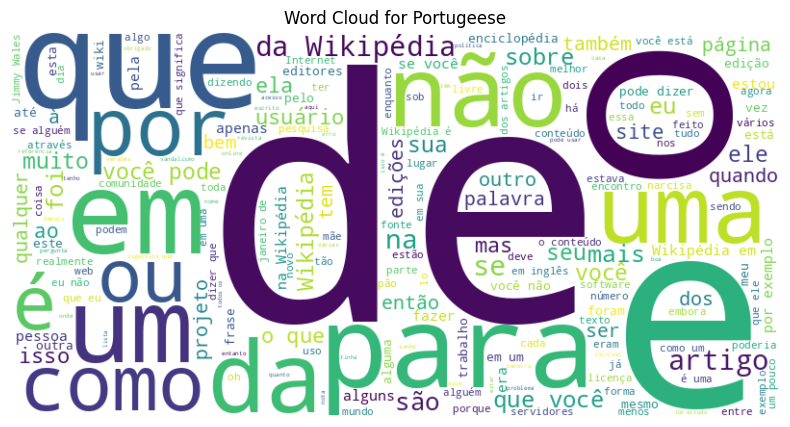

In [ ]:
 #List of languages to generate word clouds for
languages_of_interest = ['English', 'German','French','Portugeese']

# Build word cloud for each language
for language in languages_of_interest:
    text = " ".join(data[data['Language'] == language]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {language}')
    plt.axis('off')
    plt.show()

In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# Preprocess text data
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text'].values)
print(f"Sample TF-IDF vectors: {X.toarray()[:5]}")


Sample TF-IDF vectors: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
encoder = LabelBinarizer()
y = encoder.fit_transform(data['Language'].values)
print(f"Encoded labels: {y[:5]}")


Encoded labels: [[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Define the model
model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test), verbose=2)


Training set size: (8269, 5000), Test set size: (2068, 5000)
Epoch 1/10
259/259 - 19s - loss: 1.1801 - accuracy: 0.7783 - val_loss: 0.2726 - val_accuracy: 0.9613 - 19s/epoch - 73ms/step
Epoch 2/10
259/259 - 15s - loss: 0.1879 - accuracy: 0.9672 - val_loss: 0.1580 - val_accuracy: 0.9666 - 15s/epoch - 59ms/step
Epoch 3/10
259/259 - 16s - loss: 0.1233 - accuracy: 0.9692 - val_loss: 0.1333 - val_accuracy: 0.9662 - 16s/epoch - 62ms/step
Epoch 4/10
259/259 - 14s - loss: 0.1033 - accuracy: 0.9727 - val_loss: 0.1259 - val_accuracy: 0.9666 - 14s/epoch - 56ms/step
Epoch 5/10
259/259 - 10s - loss: 0.0934 - accuracy: 0.9724 - val_loss: 0.1211 - val_accuracy: 0.9657 - 10s/epoch - 38ms/step
Epoch 6/10
259/259 - 9s - loss: 0.0894 - accuracy: 0.9741 - val_loss: 0.1182 - val_accuracy: 0.9671 - 9s/epoch - 33ms/step
Epoch 7/10
259/259 - 10s - loss: 0.0880 - accuracy: 0.9727 - val_loss: 0.1173 - val_accuracy: 0.9666 - 10s/epoch - 38ms/step
Epoch 8/10
259/259 - 10s - loss: 0.0860 - accuracy: 0.9722 - val_l

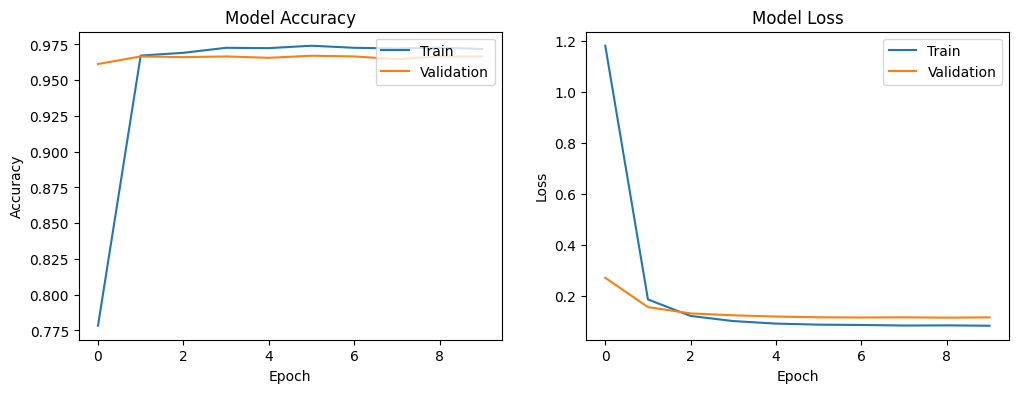

In [ ]:
# Plot the learning curves
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
predictions = model.predict(X_test.toarray())
predicted_classes = encoder.inverse_transform(predictions)
true_classes = encoder.inverse_transform(y_test)

# Evaluate performance
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)


65/65 [==============================] - 1s 7ms/step
Accuracy: 96.66%
Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      0.93      0.97       106
      Danish       0.97      0.95      0.96        73
       Dutch       1.00      0.95      0.98       111
     English       0.98      0.99      0.99       291
      French       0.97      0.98      0.97       219
      German       0.99      0.95      0.97        93
       Greek       1.00      0.94      0.97        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.99      0.96      0.97       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.98      0.99       121
  Portugeese       0.99      0.94      0.96       144
     Russian       1.00      0.94      0.97       136
     Spanish       0.97      0.96      0.97       160
    Sweedish       0.99      0.98      0.99       133
       Tamil       1.00      0.99      0.

In [ ]:
def predict_language(text, vectorizer, model, encoder):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text.toarray())

    predicted_label = encoder.inverse_transform(prediction)[0]


    return predicted_label

# Test the model with a new text
new_text = "This is a test sentence."
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")


1/1 [==============================] - 0s 27ms/step
The predicted language is: English


In [ ]:

# Test the model with a new text
new_text = "കേരളം ഒരു വിനോദസഞ്ചാരകേന്ദ്രമാണ്, പ്രകൃതിസൗന്ദര്യത്തിന് പ്രസിദ്ധമാണ്"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 22ms/step
The predicted language is: Malayalam


In [ ]:

# Test the model with a new text
new_text = "தமிழ்நாட்டில் உள்ள ஒரு நண்பரைப் பார்க்கச் சென்றால், தமிழில் உள்ள குடும்பச் சொற்களை நீங்கள் தெரிந்து கொள்ள வேண்டும். ஆங்கிலம் பேசுவதையும், திமிர்த்தனமாக பேசுவதையும"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 21ms/step
The predicted language is: Tamil


In [ ]:

# Test the model with a new text
new_text = "Où est-ce que vous allez Madame, Monsieur ?"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 21ms/step
The predicted language is: French


In [ ]:

# Test the model with a new text
new_text = "Es un placer conocerte, ¿Cómo te llamas?"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 23ms/step
The predicted language is: Spanish


In [ ]:

# Test the model with a new text
new_text = "Ela gosta de ler livros de romance nas tardes de domingo"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 29ms/step
The predicted language is: Portugeese


In [ ]:

# Test the model with a new text
new_text = "Roma è la capitale d'Italia ed è famosa per i suoi antichi monumenti"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 22ms/step
The predicted language is: Italian


In [ ]:

# Test the model with a new text
new_text = "Байкал — это самое глубокое озеро в мире и одно из самых чистых"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 28ms/step
The predicted language is: Russian


In [ ]:

# Test the model with a new text
new_text = "Stockholm är Sveriges huvudstad och är känt för sina vackra skärgårdar"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 21ms/step
The predicted language is: Sweedish


In [ ]:

# Test the model with a new text
new_text = "Amsterdam is de hoofdstad van Nederland en staat bekend om zijn grachten"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 21ms/step
The predicted language is: Dutch


In [ ]:

# Test the model with a new text
new_text = " هي عاصمة مصر وأكبر مدينة في البلاد."

predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 28ms/step
The predicted language is: Arabic


In [ ]:


# Test the model with a new text
new_text = "İstanbul, Türkiye'nin en büyük ve en kalabalık şehridir."
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 29ms/step
The predicted language is: Turkish


In [ ]:


# Test the model with a new text
new_text = "Berlin ist die Hauptstadt Deutschlands und bekannt für seine Geschichte"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 26ms/step
The predicted language is: German


In [ ]:


# Test the model with a new text
new_text = "சென்னை தமிழ் நாட்டின் தலைநகரம் மற்றும் முக்கியமான நகரமாகும்"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 33ms/step
The predicted language is: Tamil


In [ ]:


# Test the model with a new text
new_text = "København er hovedstaden i Danmark og kendt for sin havfrue statue"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 24ms/step
The predicted language is: Danish


In [ ]:

# Test the model with a new text
new_text = "ಬೆಂಗಳೂರು ಕರ್ನಾಟಕದ ರಾಜಧಾನಿ ಮತ್ತು ಅತಿ ದೊಡ್ಡ ನಗರ."
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 23ms/step
The predicted language is: Kannada


In [ ]:

# Test the model with a new text
new_text = "Αθήνα είναι η πρωτεύουσα της Ελλάδας και γνωστή για την Ακρόπολη"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 24ms/step
The predicted language is: Greek


In [ ]:

# Test the model with a new text
new_text = "दिल्ली भारत की राजधानी और एक महत्वपूर्ण शहर है"
predicted_language = predict_language(new_text, vectorizer, model, encoder)
print(f"The predicted language is: {predicted_language}")

1/1 [==============================] - 0s 24ms/step
The predicted language is: Hindi


In [ ]:
%%writefile app.py
import streamlit as st
from keras.models import load_model
import pickle
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char not in string.punctuation)
    text = ''.join(char for char in text if not char.isdigit())
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    preprocessed_text = ' '.join(lemmatized_words)
    return preprocessed_text

# Load the trained model and encoder
model = load_model('model.h5')
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)
# Display an image
st.image("/content/10775559.png", caption="Language Detection", width=300)
# Streamlit app
st.title('Language Detector')

user_input = st.text_area("Enter a sentence:")
if st.button("Detect Language"):
    processed_text = preprocess_text(user_input)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text.toarray())
    predicted_language = encoder.inverse_transform(prediction)[0]
    st.write(f"The predicted language is: {predicted_language}")


Overwriting app.py


In [ ]:
import pickle
# Save the model
model.save('model.h5')

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.106.72.241


In [ ]:
!pip install streamlit pyngrok
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.72.241:8501

npx: installed 22 in 3.67s
your url is: https://huge-turkeys-joke.loca.lt
2024-07-02 04:47:26.844754: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 04:47:26.844853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 04:47:26.849535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 04:47:34.779248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import string
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Language Detection.csv')

# Data inspection
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data["Language"].nunique())
print(data["Language"].value_counts())

# Count plot with percentage annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=data, palette='viridis', order=data['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

# Pie plot
plt.figure(figsize=(8, 8))
data['Language'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'), explode=[0.1] * data['Language'].nunique())
plt.title('Distribution of Languages')
plt.show()

# Build word cloud for each language
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def preprocess_text(text):
    """Preprocess text data"""
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = string.punctuation
    text = ''.join(char for char in text if char not in punctuation)

    # Remove digits
    text = ''.join(char for char in text if not char.isdigit())

    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join lemmatized words back into a string
    preprocessed_text = ' '.join(lemmatized_words)

    return preprocessed_text

# Preprocess text data
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_text'])
X = tokenizer.texts_to_sequences(data['cleaned_text'])
X = pad_sequences(X, maxlen=100)

# Encode labels
encoder = LabelBinarizer()
y = encoder.fit_transform(data['Language'].values)
print(f"Encoded labels: {y[:5]}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
predictions = model.predict(X_test)
predicted_classes = encoder.inverse_transform(predictions)
true_classes = encoder.inverse_transform(y_test)

# Evaluate performance
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Function to predict language
def predict_language(text, tokenizer, model, encoder):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)
    predicted_label = encoder.inverse_transform(prediction)[0]
    return predicted_label

# Test the model with a new text
new_text = "This is a test sentence."
predicted_language = predict_language(new_text, tokenizer, model, encoder)
print(f"The predicted language is: {predicted_language}")


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import string
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Language Detection.csv')

# Data inspection
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data["Language"].nunique())
print(data["Language"].value_counts())

# Count plot with percentage annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=data, palette='viridis', order=data['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

# Pie plot
plt.figure(figsize=(8, 8))
data['Language'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'), explode=[0.1] * data['Language'].nunique())
plt.title('Distribution of Languages')
plt.show()

# Build word cloud for each language
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def preprocess_text(text):
    """Preprocess text data"""
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = string.punctuation
    text = ''.join(char for char in text if char not in punctuation)

    # Remove digits
    text = ''.join(char for char in text if not char.isdigit())

    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join lemmatized words back into a string
    preprocessed_text = ' '.join(lemmatized_words)

    return preprocessed_text

# Preprocess text data
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_text'])
X = tokenizer.texts_to_sequences(data['cleaned_text'])
X = pad_sequences(X, maxlen=100)

# Encode labels
encoder = LabelBinarizer()
y = encoder.fit_transform(data['Language'].values)
print(f"Encoded labels: {y[:5]}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Build the CNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
predictions = model.predict(X_test)
predicted_classes = encoder.inverse_transform(predictions)
true_classes = encoder.inverse_transform(y_test)

# Evaluate performance
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Function to predict language
def predict_language(text, tokenizer, model, encoder):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)
    predicted_label = encoder.inverse_transform(prediction)[0]
    return predicted_label

# Test the model with a new text
new_text = "This is a test sentence."
predicted_language = predict_language(new_text, tokenizer, model, encoder)
print(f"The predicted language is: {predicted_language}")


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, GlobalMaxPooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import string
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Language Detection.csv')

# Data inspection
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data["Language"].nunique())
print(data["Language"].value_counts())

# Count plot with percentage annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=data, palette='viridis', order=data['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

# Pie plot
plt.figure(figsize=(8, 8))
data['Language'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'), explode=[0.1] * data['Language'].nunique())
plt.title('Distribution of Languages')
plt.show()

# Build word cloud for each language
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def preprocess_text(text):
    """Preprocess text data"""
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = string.punctuation
    text = ''.join(char for char in text if char not in punctuation)

    # Remove digits
    text = ''.join(char for char in text if not char.isdigit())

    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join lemmatized words back into a string
    preprocessed_text = ' '.join(lemmatized_words)

    return preprocessed_text

# Preprocess text data
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_text'])
X = tokenizer.texts_to_sequences(data['cleaned_text'])
X = pad_sequences(X, maxlen=100)

# Encode labels
encoder = LabelBinarizer()
y = encoder.fit_transform(data['Language'].values)
print(f"Encoded labels: {y[:5]}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Build the RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    SimpleRNN(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
predictions = model.predict(X_test)
predicted_classes = encoder.inverse_transform(predictions)
true_classes = encoder.inverse_transform(y_test)

# Evaluate performance
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Function to predict language
def predict_language(text, tokenizer, model, encoder):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)
    predicted_label = encoder.inverse_transform(prediction)[0]
    return predicted_label

# Test the model with a new text
new_text = "This is a test sentence."
predicted_language = predict_language(new_text, tokenizer, model, encoder)
print(f"The predicted language is: {predicted_language}")


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, GlobalMaxPooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk
import string
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Language Detection.csv')

# Data inspection
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data["Language"].nunique())
print(data["Language"].value_counts())

# Count plot with percentage annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=data, palette='viridis', order=data['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

# Pie plot
plt.figure(figsize=(8, 8))
data['Language'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'), explode=[0.1] * data['Language'].nunique())
plt.title('Distribution of Languages')
plt.show()

# Build word cloud for each language
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def preprocess_text(text):
    """Preprocess text data"""
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    punctuation = string.punctuation
    text = ''.join(char for char in text if char not in punctuation)

    # Remove digits
    text = ''.join(char for char in text if not char.isdigit())

    # Tokenize text
    words = word_tokenize(text)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join lemmatized words back into a string
    preprocessed_text = ' '.join(lemmatized_words)

    return preprocessed_text

# Preprocess text data
data['cleaned_text'] = data['Text'].apply(preprocess_text)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_text'])
X = tokenizer.texts_to_sequences(data['cleaned_text'])
X = pad_sequences(X, maxlen=100)

# Encode labels
encoder = LabelBinarizer()
y = encoder.fit_transform(data['Language'].values)
print(f"Encoded labels: {y[:5]}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Build the GRU model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    GRU(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
predictions = model.predict(X_test)
predicted_classes = encoder.inverse_transform(predictions)
true_classes = encoder.inverse_transform(y_test)

# Evaluate performance
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Function to predict language
def predict_language(text, tokenizer, model, encoder):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded_sequence)
    predicted_label = encoder.inverse_transform(prediction)[0]
    return predicted_label

# Test the model with a new text
new_text = "This is a test sentence."
predicted_language = predict_language(new_text, tokenizer, model, encoder)
print(f"The predicted language is: {predicted_language}")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Create a CountVectorizer instance
vectorizer = CountVectorizer(max_features=5000)

# Vectorize the cleaned text data
X_mnb = vectorizer.fit_transform(data['cleaned_text'])

# Split the data into training and testing sets
X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X_mnb, data['Language'], test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_mnb, y_train_mnb)

# Evaluate the Multinomial Naive Bayes model
accuracy_mnb = mnb_model.score(X_test_mnb, y_test_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb * 100:.2f}%")


In [ ]:
# Importing necessary libraries (assuming they are already imported in your script)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vectorize the cleaned text data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_lr = vectorizer.fit_transform(data['cleaned_text'])

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, data['Language'], test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_lr, y_train_lr)

# Evaluate the Logistic Regression model
accuracy_lr = lr_model.score(X_test_lr, y_test_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

# Compare with other models (e.g., LSTM, Naive Bayes)
# ...

# Predict using the Logistic Regression model
new_text = "This is a test sentence."
processed_text = preprocess_text(new_text)
vectorized_text = vectorizer.transform([processed_text])
predicted_language_lr = lr_model.predict(vectorized_text)[0]
print(f"The predicted language using Logistic Regression is: {predicted_language_lr}")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Vectorize the cleaned text data
vectorizer = TfidfVectorizer(max_features=5000)
X_knn = vectorizer.fit_transform(data['cleaned_text'])

# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, data['Language'], test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
knn_model.fit(X_train_knn, y_train_knn)

# Evaluate the KNN model
accuracy_knn = knn_model.score(X_test_knn, y_test_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Vectorize the cleaned text data
vectorizer = TfidfVectorizer(max_features=5000)
X_svm = vectorizer.fit_transform(data['cleaned_text'])

# Split the data into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, data['Language'], test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # You can use different kernels like 'linear', 'rbf', etc.
svm_model.fit(X_train_svm, y_train_svm)

# Evaluate the SVM model
accuracy_svm = svm_model.score(X_test_svm, y_test_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
